# Pobranie danych z bazy

In [24]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


con = sqlite3.connect("game_database.db")
cur = con.cursor()

sql_query = """
SELECT game.*, difficulties.difficulty_level FROM game
JOIN difficulties ON game.game_id = difficulties.game_id
WHERE game.game_id NOT IN (SELECT difficulties.game_id FROM difficulties GROUP BY difficulties.game_id HAVING COUNT(*) > 1)
    AND player_satisfaction != -1
    AND playing_time < 120;
"""

df = pd.read_sql_query(sql_query, con)
print(df.head())


   game_id  score  player_satisfaction  playing_time  difficulty_level
0        3   8698                    4     43.451462                 1
1        4   7348                    3     27.313008                 2
2       18   7291                    4     27.109043                 2
3       25   1949                    3      7.670500                 2
4       59   7501                    4     27.850465                 2


# Wykresy

## Wszystkie dane

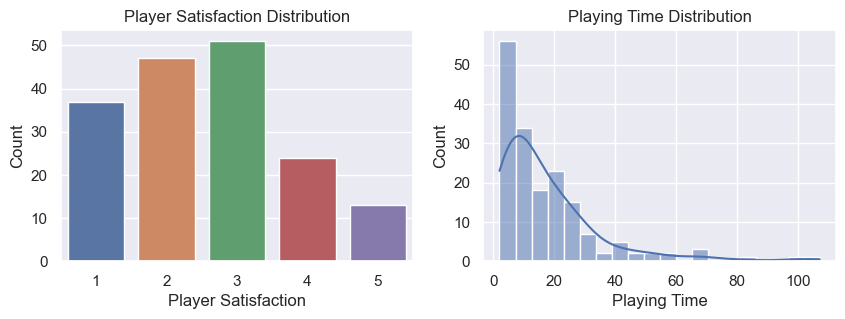

In [48]:


# Plot player satisfaction and playing_time distribution

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.countplot(x='player_satisfaction', data=df, ax=ax[0])
# sns.histplot(df['player_satisfaction'], bins=20, kde=True)
ax[0].set_title('Player Satisfaction Distribution')
ax[0].set_xlabel('Player Satisfaction')
ax[0].set_ylabel('Count')

sns.histplot(df['playing_time'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Playing Time Distribution')
ax[1].set_xlabel('Playing Time')
ax[1].set_ylabel('Count')

plt.show()

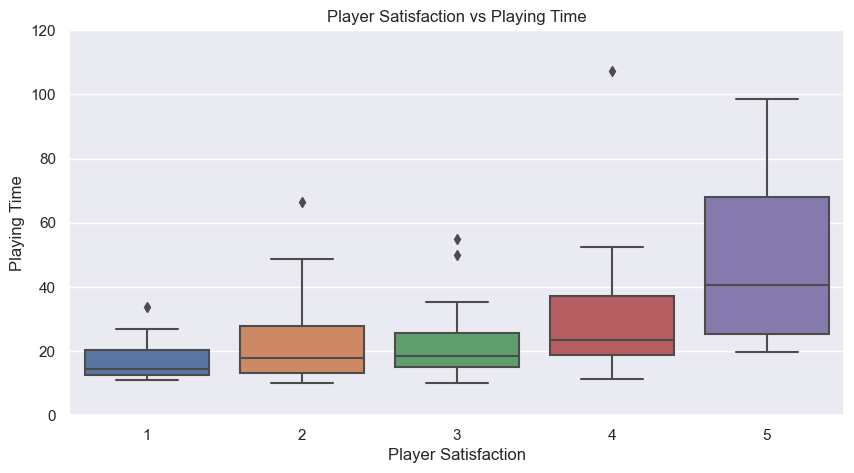

In [68]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='player_satisfaction', y='playing_time', data=df)
plt.title('Player Satisfaction vs Playing Time')
plt.xlabel('Player Satisfaction')
plt.ylabel('Playing Time')
plt.ylim(0, 120)
plt.show()

## Time [10, 120] sec

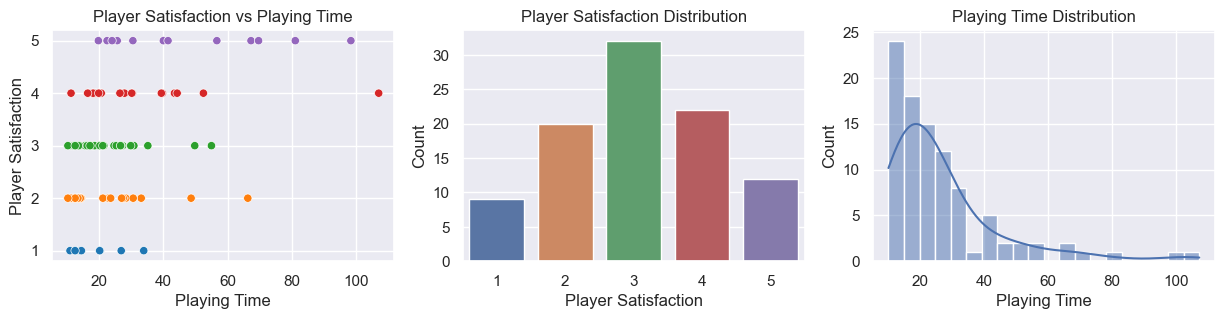

In [67]:
# plot satisfaction for playing time between 10 and 60
df_plot = df[(df['playing_time'] >= 10) & (df['playing_time'] <= 120)]

fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.scatterplot(x='playing_time', y='player_satisfaction', data=df_plot, ax=ax[0], hue='player_satisfaction', palette="tab10")
ax[0].set_title('Player Satisfaction vs Playing Time')
ax[0].set_xlabel('Playing Time')
ax[0].set_ylabel('Player Satisfaction')
# remove legend
ax[0].get_legend().remove()

sns.countplot(x='player_satisfaction', data=df_plot, ax=ax[1])
ax[1].set_title('Player Satisfaction Distribution')
ax[1].set_xlabel('Player Satisfaction')
ax[1].set_ylabel('Count')

sns.histplot(df_plot['playing_time'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Playing Time Distribution')
ax[2].set_xlabel('Playing Time')
ax[2].set_ylabel('Count')
plt.show()

## Time [0,10] sec

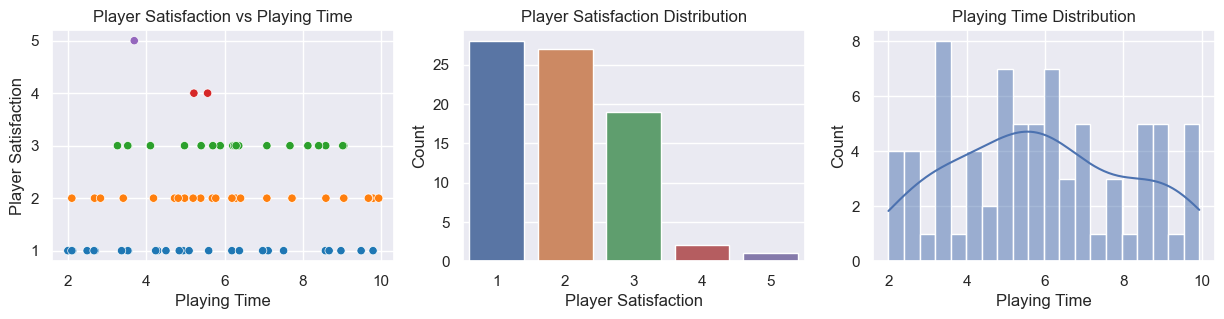

In [50]:
# plot satisfaction for playing time between 0 and 10
df_plot = df[(df['playing_time'] <= 10)]


fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.scatterplot(x='playing_time', y='player_satisfaction', data=df_plot, ax=ax[0], hue='player_satisfaction', palette="tab10")
ax[0].set_title('Player Satisfaction vs Playing Time')
ax[0].set_xlabel('Playing Time')
ax[0].set_ylabel('Player Satisfaction')
# remove legend
ax[0].get_legend().remove()

sns.countplot(x='player_satisfaction', data=df_plot, ax=ax[1])
ax[1].set_title('Player Satisfaction Distribution')
ax[1].set_xlabel('Player Satisfaction')
ax[1].set_ylabel('Count')

sns.histplot(df_plot['playing_time'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Playing Time Distribution')
ax[2].set_xlabel('Playing Time')
ax[2].set_ylabel('Count')
plt.show()

## Satisfaction $\geq$ 4

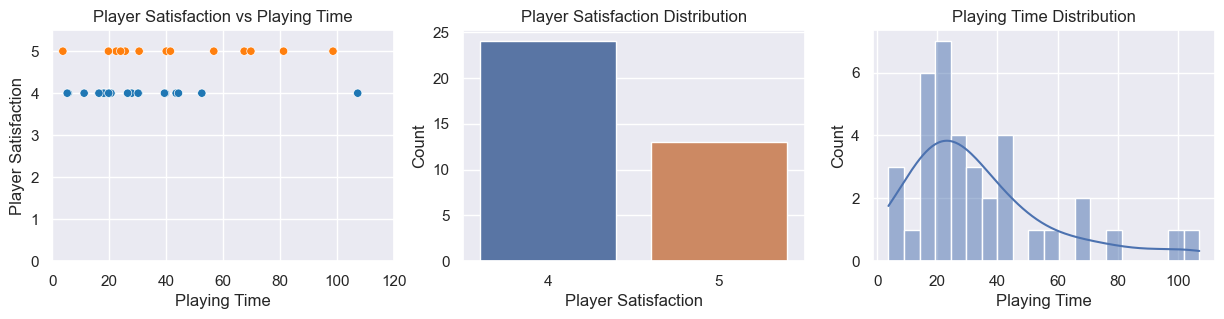

In [52]:
df_plot = df[(df['player_satisfaction'] >= 4)]

fig, ax = plt.subplots(1,3,figsize=(15, 3))
sns.scatterplot(x='playing_time', y='player_satisfaction', data=df_plot, ax=ax[0], hue='player_satisfaction', palette="tab10")
ax[0].set_title('Player Satisfaction vs Playing Time')
ax[0].set_xlabel('Playing Time')
ax[0].set_ylabel('Player Satisfaction')
ax[0].set_xlim(0, 120)
ax[0].set_ylim(0, 5.5)
ax[0].get_legend().remove()

sns.countplot(x='player_satisfaction', data=df_plot, ax=ax[1])
ax[1].set_title('Player Satisfaction Distribution')
ax[1].set_xlabel('Player Satisfaction')
ax[1].set_ylabel('Count')

sns.histplot(df_plot['playing_time'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Playing Time Distribution')
ax[2].set_xlabel('Playing Time')
ax[2].set_ylabel('Count')
plt.show()

## Difficulty

Average Player Satisfaction for Difficulty Level 1: 2.6
Average Player Satisfaction for Difficulty Level 2: 3.0789473684210527
Average Player Satisfaction for Difficulty Level 3: 3.3513513513513513


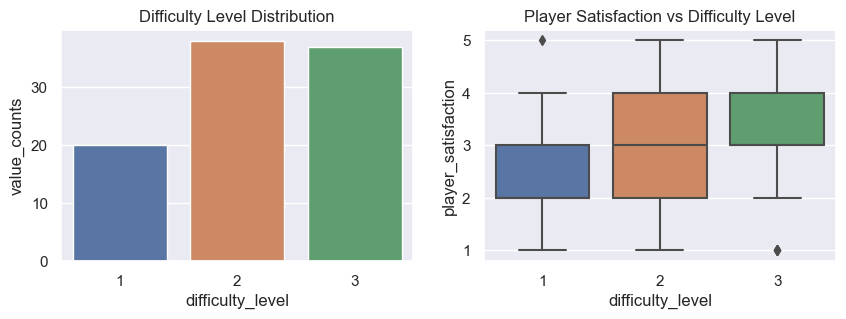

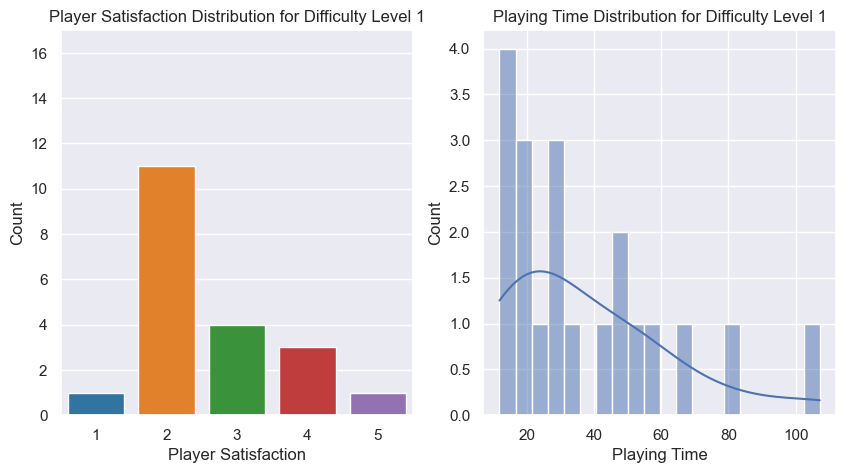

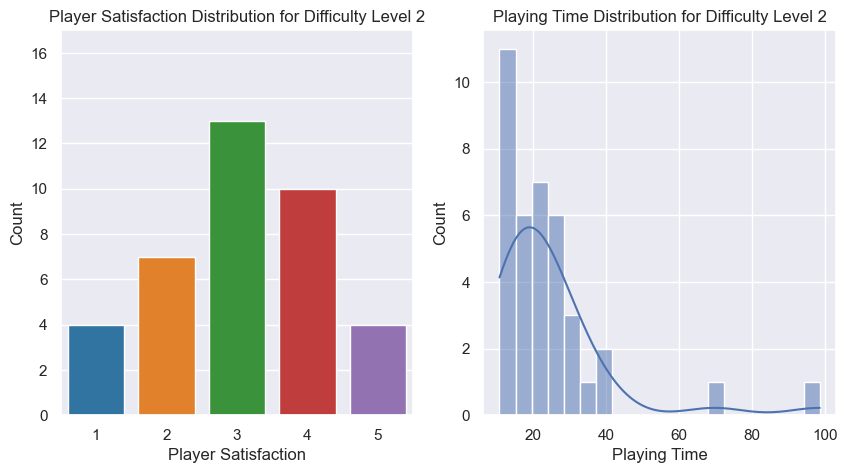

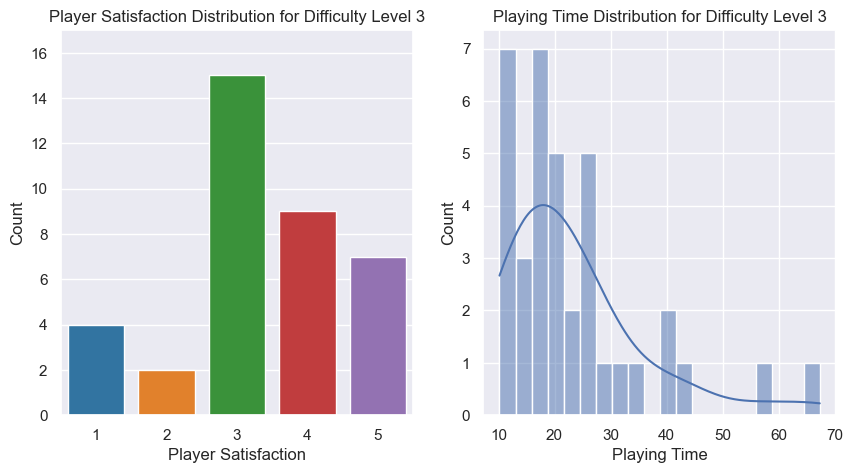

In [66]:
# plot difficulty level distribution and player satisfaction

df = df[df['playing_time'] >= 10]

# count the number of games for each difficulty level
df['value_counts'] = df['difficulty_level'].map(df['difficulty_level'].value_counts())

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.barplot(x='difficulty_level', y='value_counts', data=df, ax=ax[0])
# sns.histplot(df['difficulty_level'], bins=7, ax=ax[0])
ax[0].set_title('Difficulty Level Distribution')

sns.boxplot(x='difficulty_level', y='player_satisfaction', data=df, ax=ax[1])
ax[1].set_title('Player Satisfaction vs Difficulty Level')


# plot player satiscation and playing time distribution for each difficulty level

max_count = df.groupby(['player_satisfaction','difficulty_level']).size().max()

for difficulty_level in df['difficulty_level'].unique():
    df_plot = df[df['difficulty_level'] == difficulty_level]

    # print average player satisfaction
    print(f'Average Player Satisfaction for Difficulty Level {difficulty_level}: {df_plot["player_satisfaction"].mean()}')

    # fig, ax = plt.subplots(1, 2, figsize=(5, 3))
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.countplot(x='player_satisfaction', data=df_plot, ax=ax[0], palette="tab10")
    ax[0].set_title(f'Player Satisfaction Distribution for Difficulty Level {difficulty_level}')
    ax[0].set_xlabel('Player Satisfaction')
    ax[0].set_ylabel('Count')
    ax[0].set_ylim(0, max_count + 2)
    ax[0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    sns.histplot(df_plot['playing_time'], bins=20, kde=True, ax=ax[1])
    ax[1].set_title(f'Playing Time Distribution for Difficulty Level {difficulty_level}')
    ax[1].set_xlabel('Playing Time')
    ax[1].set_ylabel('Count')
    

plt.show()